# Homework 1 - Introdução aos Sistemas de Controle

Aluno: Igor Torquato Maia Sales
Matrícula: 485177

Este documento foi feito utilizando o Jupyter Notebooks. O link para o github com todos os arquivos gerados durante a escrita desse documento está aqui.

# Exercise 1

Encontre a transformada inversa de Laplace por cálculos manuais e verifique seus resultados usando o “Symbolic toolbox” para as seguintes funções:

$a. F_1 (s) = \Large\frac{3s^{2} + 5s}{s^{3} + 6s^{3} + 11s + 6}$

$b. F_2 (s) = \Large\frac{s^{2} + 2s + 1}{(s + 2)^{3}}$

$c. F_3 (s) = \Large\frac{2s + 3}{s^{3} + 6s^{2} + 21s + 26}$

$d. F_4 (s) = \Large\frac{1 + 2e^{-s}}{s^{2} + 3s + 2}$

## Base Teórica

Uma das formas de apresentação de um sistema LTI (Linear Time-Invariant) é o **Modelo de Entrada e Saída**, ou IO Model. Nesse modelo, o sistema é representado como uma (em um sistema SISO) ou mais (em um sistema MIMO) equações diferenciais. Vamos focar em um sistema SISO, então:

$$
h \Big( y(t), \ \dot{y}(t), ..., \ y^n (t), u(t), \dot{u}(t), ..., \ u^m (t) \Big) = 0 \\
$$

Para resolver essa equação, precisamos da **Transformada de Laplace**, que transfere a função do domínio do tempo para o domínio da frequência, onde ela pode ser resolvida algebricamente. Nesse processo, é comum passas a representar o sistema como uma função de transferência, que correlaciona a entrada e a saída:

$$
F(s) = \frac{N(s)}{D(s)}
$$

Onde o numerador $N(s)$ representa a saída do sistema e o denominador $D(s)$, também chamado de polinômio característico, representa a entrada do sistema. A partir daí, para resolver o sistema, precisamos fazer 3 passos:

1. Fatorar o polinômio característico;
2. Decompor a função de transferência em frações parciais;
3. Aplicar a inversa de laplace em cada fração parcial.

Esses são os três passos que serão demonstrados nos items abaixo.

## Item a)

$a. F_1 (s) = \Large\frac{3s^{2} + 5s}{s^{3} + 6s^{3} + 11s + 6}$

Para resolver o item a, primeiro precisamos fatorar o denominador da função de transferência, para nos possibilitar a decomposição em frações parciais. Por inspeção, percebesse que $s = -1$ é raíz do denominados $D_1 (s) = s^{3} + 6s^{3} + 11s + 6$, logo, podemos farotar $D(s)$ em  função do termo $(s + 1)$:

$$ D_1 (s) = (s + 1)(s^{2} + 5s + 6) $$

Após fazermos isso, podemos notar, por Girard, que:

$$
s_{2} + s_{3} = -5 \\
s_{2}s_{3} = 6
$$

Onde $ \ s_{2} \ e \ s_{3} \ $ são as raízes do termo $(s^{2} + 5s + 6)$. Logo, percebemos que as raízes são $s_{2} = -2 \ e \ s_{2} = -3$. $D_1 (s)$ pode ser escrita como:

$$ D(s) = (s + 1)(s + 2)(s + 3) $$

Assim, podemos reescrever a função $F_1 (s)$ como:

$$ F_1 (s) = \frac{3s^{2} + 5s}{(s + 1)(s + 2)(s + 3)} $$

Agora, podemos finalmente decompor a função de transferência $F_1 (s)$ como:

$$ F_1 (s) = \frac{3s^{2} + 5s}{(s + 1)(s + 2)(s + 3)} = \frac{A}{(s + 1)} + \frac{B}{(s + 2)} + \frac{C}{(s + 3)}$$

Para cada fração parcial de $F_1 (s)$, podemos achar o denominador simplesmente achando o valor de $(s - s_i)F_1 (s)\vert_{s \to s_i}$, onde $(s-s_i)$ é o denominador da fração parcial. No caso do item a, podemos fazer da seguinte forma:

$$A = (s + 1)F_1 (s) \vert_{s \to -1} = \frac{3(-1)^{2} + 5(-1)}{(-1 + 2)(-1 + 3)} = \frac{3 - 5}{2} = -1$$

$$B = (s + 2)F_1 (s) \vert_{s \to -2} = \frac{3(-2)^{2} + 5(-2)}{(-2 + 1)(-2 + 3)} = \frac{3 \cdot 4 - 5 \cdot 2}{-1} = -2$$

$$C = (s + 3)F_1 (s) \vert_{s \to -3} = \frac{3(-3)^{2} + 5(-3)}{(-3 + 1)(-3 + 2)} = \frac{3 \cdot 9 - 5 \cdot 3}{2} = 6$$

Dessa forma, podemos escrever nossa função de transfrência $F_1 (s)$ como:

$$ F_1 (s) = \frac{3s^{2} + 5s}{(s + 1)(s + 2)(s + 3)} =  \frac{-1}{(s + 1)} + \frac{-2}{(s + 2)} + \frac{6}{(s + 3)} $$

Em python, primeiro devemos declarar nossa função de transferência:

In [1]:
import sympy as sym
from sympy.abc import s,t

F1 = (3*(s**2) + 5*s)/(s**3 + 6*(s**2) + 11*s + 6)

F1

(3*s**2 + 5*s)/(s**3 + 6*s**2 + 11*s + 6)

Podemos fazer a decomposição em frações parciais usando a função `apart()` da biblioteca `sympy`. Mesmo que isso não seja necessário para fazer a inversa da transformada de laplace, vamos fazer para checar se nossas contas manuais estão corretas.

In [2]:
F1_pf = sym.apart(F1)

F1_pf

6/(s + 3) - 2/(s + 2) - 1/(s + 1)

Com as frações parciais disponíveis, podemos aplicar a inversa de laplace $\mathcal{L}^{-1}\Big[\frac{1}{s + a}\Big] = e^{-at}$ em cada fração parcial. Veja:

 
$$\mathcal{L}^{-1}\Big[\frac{-1}{(s + 1)}\Big] = -e^{-t}$$

$$\mathcal{L}^{-1}\Big[\frac{-2}{(s + 2)}\Big] = -2e^{-2t}$$

$$\mathcal{L}^{-1}\Big[\frac{6}{(s + 3}\Big] = 6e^{-3t}$$

Assim, podemos escrever nossa função $f_1 (t)$ como o resultado da transformada inversa de laplace na função de transferência $F_1 (s)$:

$$ f_{1}(t) = \mathcal{L}^{-1}[F_{1}(s)] = -e^{-t}-2e^{-2t}+6e^{-3t} $$

Em python, podemos fazer a transformada inversa de laplace com a função `inverse_laplace_transform()` da biblioteca `sympy`. Fica assim:

In [3]:
f1 = sym.inverse_laplace_transform(F1, s, t)

f1

(-exp(2*t) - 2*exp(t) + 6)*exp(-3*t)*Heaviside(t)

Perceba que o programa colocou $e^{-3t}$ em evidência em todos os termos. Porém, ao expandirmos o resultado, percebemos que ele está certo.

## Item B

$b. F_2 (s) = \Large\frac{s^{2} + 2s + 1}{(s + 2)^{3}}$

Perceba que o denominador $D_2 (s)$ da função $F_2 (s)$ já está fatorado, mas apresenta uma raíz com multiplicidade maior do que 1, ou seja, um dos fatores possui grau maior que 1. Nesse caso, a decomposição em frações parciais gera uma fração para cada natural menor ou igual ao grau do fator. No caso item B, temos uma raíz com multiplicidade 3, resultando na seguinte decomposição:

$$
F_2 (s) = \frac{s^{2} + 2s + 1}{(s + 2)^{3}} = \frac{A_0 }{(s + 2)^{3}} + \frac{A_1 }{(s + 2)^{2}} + \frac{A_2 }{s + 2}
$$

Nesse caso, sabendo que $i! \cdot A_i = F^{(n)} (s)\vert_{s \to s_i}$, para todo $i \ge 1$ e mantendo a estratégia do item anterior no caso de $A_0$:


$$A_0  = (s+2)^{3}F_2(s) \vert_{s \to -2} = (-2)^{2} + 2 \cdot (-2) + 1 = 1$$

$$A_1  = F_2'(s) \vert_{s \to -2} = 2 \cdot (-2) + 2 = -2$$

$$A_2  = \frac{F_2''(s) \vert_{s \to -2}}{2!} = \dfrac{s(2s + 2)}{ds} \Big\vert_{s \to -2} = \frac{2}{2} = 1$$

Finalmente, achamos a nossa função decomposta em frações parciais como:

$$
F_2 (s) = \frac{1}{(s + 2)^{3}} + \frac{-2}{(s + 2)^{2}} + \frac{1}{s + 2}
$$

Em python:

In [4]:
F2 = (s**2 + 2*s +1)/(s + 2)**3

F2

(s**2 + 2*s + 1)/(s + 2)**3

In [5]:
F2_pf = sym.apart(F2)

F2_pf

1/(s + 2) - 2/(s + 2)**2 + (s + 2)**(-3)

Podemos aplicar agora a inversa de laplace $\mathcal{L}^{-1}\Big[\frac{1}{(s + a)^{n}}\Big] = \frac{1}{(n-1)!}t^{n-1}e^{-at}$ para calcular cada termo da nossa função $f_2 (t)$:

$$
f_2 (t) = e^{-2t} - 2te^{-2t} + \frac{1}{2}t²e^{-2t}
$$

Em python:

In [6]:
f2 = sym.inverse_laplace_transform(F2, s, t)

f2

(t**2 - 4*t + 2)*exp(-2*t)*Heaviside(t)/2

Novamente, perceba que o programa coloca $\large\frac{e^{-2t}}{2}$ em evidência, mas achamos a resposta correta.

## Item C

$c. F_3 (s) = \Large\frac{2s + 3}{s^{3} + 6s^{2} + 21s + 26}$

Na função $F_3(s)$, percebemos por inspeção que $D_3(s)$ possui $-2$ como raíz, logo:

$$c. F_3 (s) = \frac{2s + 3}{(s + 2)(s² + 4s + 13)}$$

Por baskara, percebemos que as raízes de $(s² + 4s + 13)$ são os complexos conjugados $-2+3i \ e \ -2-3i$. Logo, nossa decomposição em frações parciais fica da seguinte forma:

$$F_3 (s) = \frac{2s + 3}{(s+2)(s+2+3i)(s+2-3i)} = \frac{A}{(s+2)} + \frac{B}{(s+2+3i)} + \frac{C}{(s+2-3i)}$$

Podemos achar $A, \ B \ e \ C$ da seguinte forma:

$$A = (s + 2)F_1 (s) \vert_{s \to -2} = \frac{2 \cdot (-2) + 3}{(-2)² + 4(-2) + 13} = \frac{-1}{4-8+13} = \frac{-1}{9}$$

$$B = (s + 2 + 3i)F_1 (s) \vert_{s \to -2-3i} = \frac{2(-2-3i)+3}{(-2-3i+2)(-2-3i+2+3i)} = \frac{1+6i}{18}$$

$$C = (s + 2 - 3i)F_1 (s) \vert_{s \to -2+3i} = \frac{2(-2+3i)+3}{(-2+3i+2)(-2+3i+2+3i)} = \frac{1-6i}{18}$$

Logo, nossa finção de transferência decomposta em frações parciais fica:

$$
F_3 (s) = \frac{-1}{9(s+2)} + \frac{1+6i}{18(s+2+3i)} + \frac{1-6i}{18(s+2-3i)}
$$

Em python:

In [7]:
F3 = (2*s + 3)/(s**3 + 6*(s**2) + 21*s + 26)

F3

(2*s + 3)/(s**3 + 6*s**2 + 21*s + 26)

In [8]:
F3_pf = sym.apart(F3)

F3_pf

(s + 20)/(9*(s**2 + 4*s + 13)) - 1/(9*(s + 2))

Perceba que o programa não decompôs $F_3(s)$ em frações parciais com denominador complexo e colocou um termo com denominador quadrático representando a soma dessas frações.

Faremos algo parecido, mas racionalizando cada fração com denominador complexo:

$$D = \frac{B}{(s+2+3i)} + \frac{C}{(s+2-3i)}$$

$$\therefore D = \frac{1}{18}\Big(\frac{1+6i}{(s+2+3i)} + \frac{1-6i}{(s+2-3i)}\Big)$$

$$\therefore D = \frac{1}{18}\Big(\frac{(s+2-3i)(1+61)+(s+2+3i)(1-61)}{(s+2)²+3²}\Big)$$

$$\therefore D = \frac{1}{9}\Big(\frac{(s+2)+2 \cdot 3²}{(s+2)²+3²}\Big)$$

$$\therefore D = \frac{1}{9}\Big(\frac{(s+2)}{(s+2)²+3²}\Big) + \frac{2}{3}\Big(\frac{3}{(s+2)²+3²}\Big)$$

Logo:

$$
F_3 (s) = \frac{-1}{9(s+2)}  + \frac{1}{9}\Big(\frac{(s+2)}{(s+2)²+3²}\Big) + \frac{2}{3}\Big(\frac{3}{(s+2)²+3²}\Big)
$$

Podemos usar as inversas de Laplace $\mathcal{L}^{-1}\Big[\frac{\omega}{((s + a)^{2} + \omega²}\Big] = e^{-at}\sin(\omega t)$ e $\mathcal{L}^{-1}\Big[\frac{s+a}{((s + a)^{2} + \omega²}\Big] = e^{-at}\cos(\omega t)$ para achar a função $f_3(t)$:

$$
f_3(t) = \frac{-1}{9}e^{-2t} + \frac{1}{9}e^{-2t}\cos(3t) + \frac{2}{3}e^{-2t}\sin(3t)
$$

Em python:

In [9]:
f3 = sym.inverse_laplace_transform(F3, s, t)

f3

(6*sin(3*t) + cos(3*t) - 1)*exp(-2*t)*Heaviside(t)/9

Perceba que o programa colocou $\large\frac{e^{}-2t}{9}$ em evidência, mas temos a resposta correta.

## Item D

$d. F_4 (s) = \Large\frac{1 + 2e^{-s}}{s^{2} + 3s + 2}$

Por Girard, percebemos que as raízes do denominador $D_4(s)$ de $F_4(s)$ são $s_1 = -1 e s_2 = -2$. Logo:

$$F_4 (s) = \frac{1 + 2e^{-s}}{(s+1)(s+2)} = \frac{1}{(s+1)(s+2)}+\frac{2e^{-s}}{(s+1)(s+2)}$$

Utilizando as mesmas estratégias para a primeira parcela, temos que:

$$
\frac{1}{(s+1)(s+2)} = \frac{A_1}{(s+1)} + \frac{B_1}{(s+2)}
$$

Assim:

$$A_1 = (s + 1)F_4 (s) \vert_{s \to -1} = \frac{1}{(-1+2)} = 1$$

$$B_1 = (s + 2)F_4 (s) \vert_{s \to -2} = \frac{1}{(-2+1)} = -1$$

Na segunda parcela, podemos colocar $2e⁻s$ em evidência e fazer a mesma decomposição, $F_4(s)$ fica assim:

$$
F_4(s) = \frac{1}{(s+1)} + \frac{-1}{(s+2)} + \frac{2e^{-s}}{(s+1)} + \frac{-2s^{-s}}{(s+2)}
$$

Em python, não conseguimos decompor uma função com numerador não polinomial usando `sym.apart()`, então vamos separar manualmente a função $F_4(s)$:

In [10]:
F4_1 = (1)/(s**2 + 3*s + 2)

F4 = F4_1 + 2*sym.exp(-s)*F4_1

F4

1/(s**2 + 3*s + 2) + 2*exp(-s)/(s**2 + 3*s + 2)

In [11]:
F4_1pf = sym.apart(F4_1)

F4_pf = F4_1pf + 2*sym.exp(-s)*F4_1pf

F4_pf

2*(-1/(s + 2) + 1/(s + 1))*exp(-s) - 1/(s + 2) + 1/(s + 1)


Sabendo que a inversa de $\mathcal{L}^{-1}[e^{-\alpha t}F(s)] = f(t-\alpha)u(t-\alpha)$, onde $u(t-\alpha)$ é o degral unitário na translação do tempo, podemos achar a inversa $f_4(t)$ como:

$$ f_4(t) = e^{-t} - e^{-2t} + (2e^{1-t} - 2e^{2-2t})u(t-1)$$

Em pyhton:

In [12]:
f4 = sym.inverse_laplace_transform(F4, s, t)

f4

(-(1 - exp(t))*Heaviside(t) + 2*(1 - exp(1 - t))*exp(t + 1)*Heaviside(t - 1))*exp(-2*t)

Perceba que, como de costume, o programa colocou alguns termos em evidência, mas nos deu uma resposta correta.

# Exercise 2:

Afim de estudar o efeito dos zeros na resposta de um sistema, considere a função de transferência dada na equação

$G(s) = \Large\frac{\alpha s + 1}{2s² + 3s + 1}$

Faça o seguinte:

1. Para $\alpha = 1$, encontre e plote as respostas ao degrau unitário e ao impulso.
2. Para $\alpha = [−1, 0, 1, 2]$, plote e compare a resposta ao degrau unitário.
3. Discuta como o sistema varia sua resposta para os diferentes valores de α.

## Base Teórica

Como expicado no item anterios, uma função de transferência pode ser escrita como:

$$
F(s) = \frac{N(s)}{D(s)} = \frac{b_ms^m + b_{m-1}s^{m-1} + ... + b_1s + b_0}{a_ns^n + a_{n-1}s^{n-1} + ... + a_1s + a_0}
$$

Ao fatorarmos $N(s) \ e \ D(s)$, podemos representar a função como:

$$
F(s) = K\frac{(s-z_1)(s-z_2)...(s-z_{m-1})(s-z_m)}{(s-p_1)(s-p_2)...(s-p_{n-1})(s-p_n)}
$$

Onde:

- $\{z_i \mid 1 \leq i \leq m\}$ são as raízes ne $N(S) = 0$ e são definidas como os **zeros** do sistema
- $\{p_i \mid 1 \leq i \leq n\}$ são as raízes ne $D(S) = 0$ e são definidas como os **polos** do sistema
- $K$ é a constante de ganho.

No caso de $G(s)$, temos que o coeficiente líder do numerador $N(S) = \alpha s + 1$ será $\alpha$. Nesse caso:

$$
K = \frac{b_m}{a_n} = \frac{\alpha}{2}
$$

Logo, $\alpha$ influencia diretamente na constante de ganho da função de transferência.

## Parte 1

1. Para $\alpha = 1$, encontre e plote as respostas ao degrau unitário e ao impulso.

### Resposta ao Impulso

A partir de agora, vamos definir $Y(s) = N(s)$ como a saída e $U(s) = D(s)$ como a entrada.

Nesse caso, sabendo que para o degrau unitário temos que $U(s) = 1$, podemos definir nossa saída como:

$$G(s) = \frac{Y(s)}{U(s)}$$

$$\therefore Y(s) = G(s)U(s)$$

$$\therefore Y(s) = G(s) = \frac{s + 1}{2s² + 3s + 1}$$

Logo, como sabemos que $K = \frac{1}{2}$, fpodemos fatorar nosso denominador como: 

$$
Y(s) = \frac{\frac{1}{2}(s + 1)}{(s+1)(s+\frac{1}{2})} = \frac{\frac{1}{2}}{s+\frac{1}{2}}
$$

Logo, aplicando a inversa de laplace:

$$
y(t) = \frac{1}{2}e^{-\frac{1}{2}t}
$$

Em python, vamos utilizar a biblioteca `control` para encontrar e plotar a resposta do sistema. Vamos usar a função `tf()` para gerar um modelo da nossa função de transferência e usar a função `impulse_response()` para gerar a resposta da função de transferência ao impulso. Também vamos usar a biblioteca `malplotlib`para printar os gráficos gerados pelo código: 

In [13]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

num = [1, 1]
den = [2, 3, 1]

W = ct.tf(num, den)

W

TransferFunction(array([1, 1]), array([2, 3, 1]))

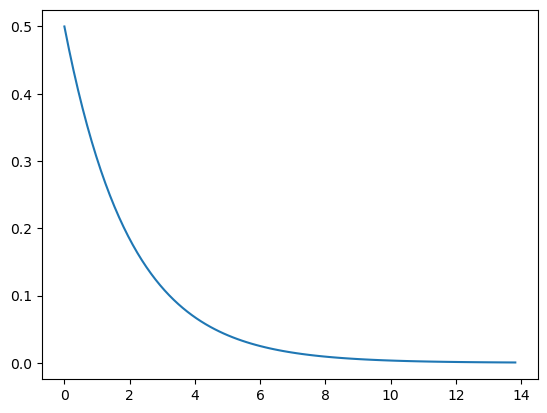

In [14]:
xi, yi = ct.impulse_response(W)

plt.plot(xi, yi)
plt.show()

### Resposta ao Degrau Unitário

No caso do degrau unitário, temos que $U(s) = \frac{1}{s}$, logo:

$$
Y(s) = \frac{\frac{1}{2}}{s(s+\frac{1}{2})} = \frac{A}{s} + \frac{B}{s + \frac{1}{2}}
$$

Usando o mesmo método do **Exercise 1**:

$$A = (s)Y(s) \vert_{s \to 0} = \frac{\frac{1}{2}}{0 + \frac{1}{2}} = 1$$

$$B = (s + \frac{1}{2})Y(s) \vert_{s \to -\frac{1}{2}} = \frac{\frac{1}{2}}{-\frac{1}{2}} = -1$$

Logo:

$$
Y(s) = \frac{1}{s} + \frac{-1}{s + \frac{1}{2}}
$$

Logo, aplicando a inversa de Laplace:

$$
y(t) = 1(t) - e^{-\frac{1}{2}t}
$$

Onde 1(t) é a função degrau unitário. Em python:

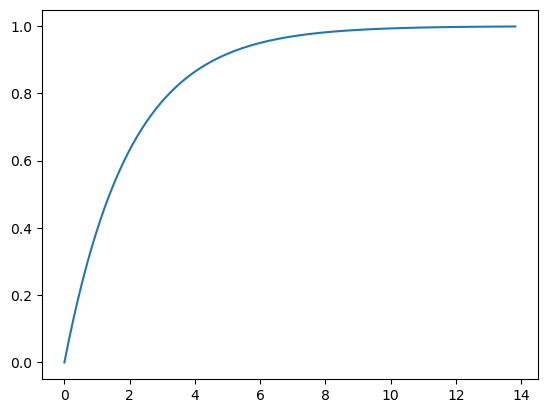

In [15]:
xs, ys = ct.step_response(W)

plt.plot(xs, ys)
plt.show()

## Parte 2

Para a segunda parte, vamos montar nossos 4 modelos, um para cada valor de $\alpha$:

In [16]:
num1 = [-1, 1]
num2 = [0, 1]
num3 = [1, 1]
num4 = [2, 1]

W1 = ct.tf(num1, den)
W2 = ct.tf(num2, den)
W3 = ct.tf(num3, den)
W4 = ct.tf(num4, den)

W1

TransferFunction(array([-1,  1]), array([2, 3, 1]))

In [17]:
W2

TransferFunction(array([1]), array([2, 3, 1]))

In [18]:
W3

TransferFunction(array([1, 1]), array([2, 3, 1]))

In [19]:
W4

TransferFunction(array([2, 1]), array([2, 3, 1]))

Agora, podemos achar a resposta ao degrau unitário de cada uma delas e printar em um mesmo gráfico:

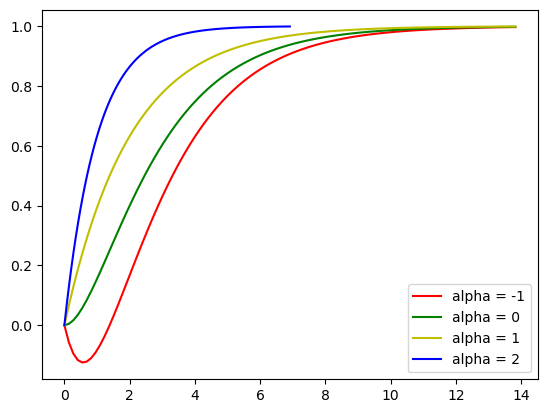

In [20]:
x1, y1 = ct.step_response(W1)
x2, y2 = ct.step_response(W2)
x3, y3 = ct.step_response(W3)
x4, y4 = ct.step_response(W4)

plt.plot(x1, y1, color='r', label='alpha = -1')
plt.plot(x2, y2, color='g', label='alpha = 0')
plt.plot(x3, y3, color='y', label='alpha = 1')
plt.plot(x4, y4, color='b', label='alpha = 2')

plt.legend()
plt.show()

## Parte 3

3. Discuta como o sistema varia sua resposta para os diferentes valores de α.

Como discutido na base teórica desse exercício, a constante $\alpha$ está diretamente ligada à constante de ganho de uma função de transferência. Logo, quanto maior o $\alpha$, maior a constante de ganho $K$ e, analisando o gráfico anterior, para o caso particular da rsposta ao degrau unitário, quanto maior a constante de ganho, mais rápido o sistema converge para 1.

## Exercise 3

Considere o modelo de entrada-saída na equação

$$ \frac{d²y(t)}{dt²} + 2\frac{dy(t)}{dt} + y(t) = 4\frac{d²u(t)}{du²} + 15\frac{du(t)}{du} + 19u(t)$$

1. Defina o polinômio característico e represente graficamente os modos do sistema
2. Dadas as condições iniciais na equação, encontre a evolução livre do sistema na equação

$$ y(t)\vert_{s \to 0} = 1, \ \frac{dy(t)}{dt}\Big\vert_{s \to 0} = 1 $$

3. Encontre a resposta forçada do sistema sujeito a uma entrada em degrau unitário
4. Por meio da linguagem de programação de sua escolha, plote a resposta y(t) e comente seus resultados


## Parte 1

1. Defina o polinômio característico e represente graficamente os modos do sistema

Considerando todas as condições iniciais iguais a zero, a transformada de laplace da equação pode ser dada por

$$
(s² + 2s + 1)Y(s) = (4s² + 15s + 19)U(s) \\
\therefore F(s) = \frac{Y(s)}{U(s)} = \frac{4s² + 15s + 19}{s² + 2s + 1}
$$

Logo, o polinômio característico pode ser dado pelo denominador $D(s)$ da função de transferência $F(s)$. Por produtos notáveis, $D(s)$ pode ser escrito como:

$$
D(s) = s² + 2s + 1 = (s+1)²
$$

Os modos do sistema são definidos como as raízes do polinômio característico, também conhecidos como os **polos** do sistema. Logo, o sistema possui dois modos reais negativos iguais a -1. Podemos plotar essas raízes no plano de Argard-Gauss, também conhecido como plano dos complexos. Em python, podemos fazer da seguinte forma:

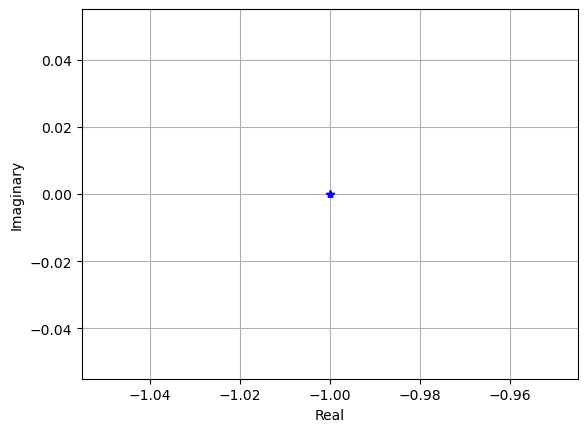

In [21]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([-1, -1])

x = data.real
y = data.imag

plt.plot(x, y, 'b*')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.grid()
plt.show()

## Parte 2

2. Dadas as condições iniciais na equação, encontre a evolução livre do sistema na equação

Nesse caso, devemos levar em consideração a seguinte transformada de Laplace:

$$
\mathcal{L}\Big[ \frac{d^nf(t)}{dt^n} \Big] = s^nF(s) - \sum\limits_{k = 1}^{n}s^{n-k}f^{k-s}(0)
$$

Logo, aplicando a transformada de Laplace:

$$s²Y(s) - sy(0) - \dot{y}(0) + 2sY(s) -2y(0) + Y(s) = (4s² + 15s + 19)U(s)$$

$$\therefore (s² + 2s + 1)Y(s) - s - 3 = (4s² + 15s + 19)U(s)$$

$$\therefore (s² + 2s + 1)Y(s) = (4s² + 15s + 19)U(s) + s + 3$$

$$\therefore Y(s) = \underbrace{\frac{4s² + 15s + 19}{s² + 2s + 1}U(s)}_{Forced \ Response} + \underbrace{\frac{s + 3}{s² + 2s + 1}}_{Free \ Response}$$

Nesse caso, tudo que independe da entrada $U(s)$ é considerado como a resposta livre e tudo que depende de $U(s)$ é considerado como resposta forçada. Como queremos a evolução livre, primeiro precisamos decompor em frações parciais:

$$
Y_{Free}(s) = \frac{s+3}{s² + 2s + 1} = \frac{s+3}{(s+1)²} = \frac{A_0}{(s+1)²} + \frac{A_1}{s+1}
$$

Vamos achar A_0 e A_1 como já descrito no **Exercise 1**:

$$A_0 = (s+1)²Y_{Free}(s) \vert_{s \to -1} = (-1 + 3) = 2$$

$$A_1 = \frac{d(s+1)²Y_{Free}(s)}{ds} \Big\vert_{s \to -1} = \frac{d(s+3)}{ds} \Big\vert_{s \to -1} = 1$$

Logo:

$$
Y_{Free}(s) = \frac{2}{(s+1)²} + \frac{1}{s+1}
$$

Assim, aplicando a inversa de Laplace:

$$
y_{Free}(t) = e^{-t} + 2te^{-t}
$$

Em python, poderiamos usar a função `nlsys()` da biblioteca `control`para criar um modelo de entrada e saída não linear (que é nosso caso). Porém, ao invés disso, vamos aproveitar que já temos nossa função de transferência separada em parte Livre e Parte Forçada para resolver como já temos resolvido no decorrer desse trabalho:

In [22]:
import sympy as sym
from sympy.abc import s,t

Yfree = (s + 3)/(s**2 + 2*s + 1)

Yfree

(s + 3)/(s**2 + 2*s + 1)

In [23]:
Yfree_pf = sym.apart(Yfree)

Yfree_pf

1/(s + 1) + 2/(s + 1)**2

In [24]:
yfree = sym.inverse_laplace_transform(Yfree, s, t)

yfree

(2*t + 1)*exp(-t)*Heaviside(t)

Agora, utilizando a biblioteca `control`, podemos achar a resposta livre do sistema como uma resposta ao impulso, já que, nesse caso, $U(s) = 1$. Observe:

In [25]:
import control as ct

num_free = [1, 3]
den = [1, 2, 1]

Y_free = ct.tf(num_free, den)

Y_free

TransferFunction(array([1, 3]), array([1, 2, 1]))

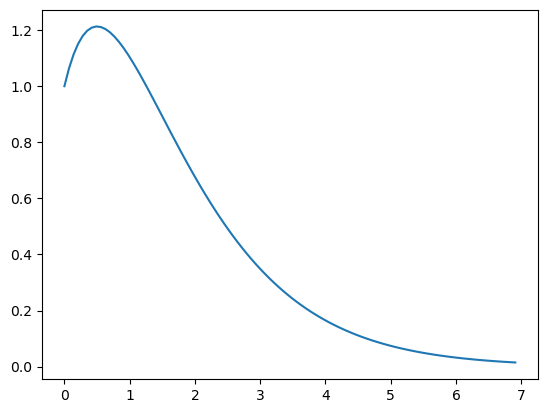

In [26]:
x_free, y_free = ct.impulse_response(Y_free)

plt.plot(x_free, y_free)
plt.show()

## Parte 3

3. Encontre a resposta forçada do sistema sujeito a uma entrada em degrau unitário

Como encontrado na **Parte 2**, a resposta forçada pode ser escrita como:

$$
Y_{Forced}(s) = \frac{4s² + 15s + 19}{s² + 2s + 1}U(s)
$$

Como sabemos que $U(s) = \frac{1}{s}$ no caso do degral unitário, podemos decompor a resposta forçada da seguinte forma:

$$
Y_{Forced}(s) = \frac{4s² + 15s + 19}{s(s+1)²} = \frac{B_0}{(s+1)²} + \frac{B_1}{s+1} + \frac{C}{s}
$$

Logo:

$$B_0 = (s+1)²Y_{Forced}(s) \vert_{s \to -1} = \frac{4(-1)² + 15(-1) + 19}{-1} = -8$$

$$B_1 = \frac{d(s+1)²Y_{Forced}(s)}{ds} \Big\vert_{s \to -1} = \frac{d}{ds} \frac{4s² + 15s + 19}{s} \Big\vert_{s \to -1} = \frac{(8s + 15)s - (4s² + 15s + 19}{s²} \Big\vert_{s \to -1} = -15$$

$$C = (s)²Y_{Forced}(s) \vert_{s \to 0} = 19$$

Logo:

$$
Y_{Forced}(s) = \frac{-8}{(s+1)²} + \frac{-15}{s+1} + \frac{19}{s}
$$

Assim, aplicando a inversa de laplace:

$$
y_{Forced}(t) = 19 - 15e^{-t} -8te^{-t}
$$

Em python:

In [27]:
Yforced = (4*(s**2) + 15*s + 19)/(s*(s**2 + 2*s + 1))

Yforced

(4*s**2 + 15*s + 19)/(s*(s**2 + 2*s + 1))

In [28]:
Yforced_pf = sym.apart(Yforced)

Yforced_pf

-15/(s + 1) - 8/(s + 1)**2 + 19/s

In [29]:
yforced = sym.inverse_laplace_transform(Yforced, s, t)

yforced

(-8*t + 19*exp(t) - 15)*exp(-t)*Heaviside(t)

Utilizando a biblioteca `control`, podemos achar a resposta do sistema ao degrau unitário e plotar. Observe:

In [30]:
num_forced = [4, 15, 19]
den = [1, 2, 1]

Y_forced = ct.tf(num_forced, den)

Y_forced

TransferFunction(array([ 4, 15, 19]), array([1, 2, 1]))

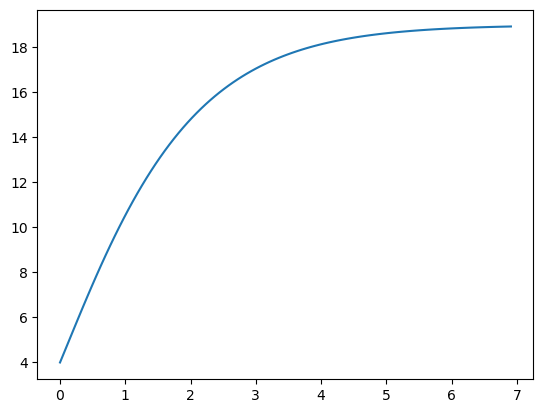

In [31]:
x_forced, y_forced = ct.step_response(Y_forced)

plt.plot(x_forced, y_forced)
plt.show()

## Parte 4

4. Por meio da linguagem de programação de sua escolha, plote a resposta y(t) e comente seus resultados

Finalmente, podemos somar as respostas de $y_{Free}(t) \ e \ y_{Forced}(t)$ para achar nossa resposta final. 

$$
y(t) = y_{Free}(t) + y_{Forced}(t) = (e^{-t} + 2te^{-t}) + (19 - 15e^{-t} -8te^{-t})
$$

Em python:

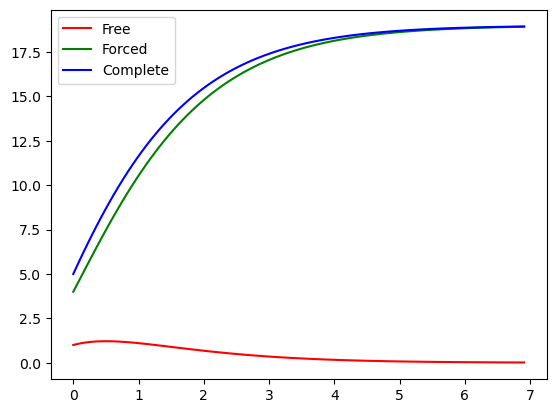

In [32]:
x = x_free
y = y_free + y_forced

plt.plot(x_free, y_free, color='r', label='Free')
plt.plot(x_forced, y_forced, color='g', label='Forced')
plt.plot(x, y, color='b', label='Complete')

plt.legend()
plt.show()

Observe que a resposta completa é levemente maior que a resposta forçada no início. Mas como a resposta livre decai à zero com o tempo, a resposta forçada se aproxima cada vez mais da resposta completa, deixado a resposta livre desprezivel.

## Exercise 4

Dado o modelo de espaço de estados em

$$
\begin{cases}
   \begin{bmatrix} \dot{x_1(t)} \\ \dot{x_2(t)} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -5 & -2 \end{bmatrix}\begin{bmatrix} x_1(t) \\ x_2(t) \end{bmatrix} + \begin{bmatrix} 0 \\ 2 \end{bmatrix}u(t) \\
   y(t) = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} x_1(t) \\ x_2(t) \end{bmatrix} + u(t)
\end{cases}
$$

1. Encontre a função de transferência correspondente $G(s) = Y(s)/U(s)$
2. Encontre um modelo de entrada-saída equivalente ao modelo de espaço de estado
3. Encontre a evolução forçada de estado e saída como resposta da entrada $u(t) = e^{-3t}$

## Parte 1

1. Encontre a função de transferência correspondente $G(s) = Y(s)/U(s)$

A função de transferência pode ser dada por:

$$
G(s) = \frac{Y(s)}{U(s)} = C(sI - A)^{-1}B + D
$$

Onde:

$$A = \begin{bmatrix} 0 & 1 \\ -5 & -2 \end{bmatrix}; \ B = \begin{bmatrix} 0 \\ 2 \end{bmatrix}; \ C = \begin{bmatrix} 0 & 1 \end{bmatrix}; \ D = 1$$

$$sI - A)^{-1} = \frac{adj(sI - A)}{det(sI - A)}$$

Logo:

$$sI - A = s\begin{bmatrix} 1 & 10\\ 0 & 1 \end{bmatrix} - \begin{bmatrix} 0 & 1 \\ -5 & -2 \end{bmatrix} = \begin{bmatrix} s & -1 \\ 5 & 2 + s \end{bmatrix}$$

$$\therefore adj(sI - A) = \begin{bmatrix} s + 2 & -5 \\ 1 & s \end{bmatrix} $$

$$\therefore det(sI - A) = s(2 + s) + 5 = s² + 2s + 5$$

Então, podemo escrever $G(s)$ como:

$$G(s) = \frac{\begin{bmatrix} 0 & 1 \end{bmatrix}\begin{bmatrix} s + 2 & -5 \\ 1 & s \end{bmatrix}\begin{bmatrix} 0 \\ 2 \end{bmatrix}}{s² + 2s + 5} + 1$$

$$\therefore G(s) = \frac{\begin{bmatrix} 1 & s \end{bmatrix}\begin{bmatrix} 0 \\ 2 \end{bmatrix}}{s² + 2s + 5}$$

$$\therefore G(s) = \frac{25}{s² + 2s + 5} + 1$$

$$\therefore G(s) = \frac{s² + 4s + 5}{s² + 2s + 5} = \frac{Y(s)}{U(s)}$$

Em python, podemos criar um sistema no espaço de estados com a função `ct.ss()` da biblioteca `control`. Para isso, devemos definir nossas matrizes:

In [33]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

A = [[0, 1],[-5, -2]]
B = [[0], [2]]
C = [[0, 1]]
D = [[1]]

Sys = ct.ss(A, B, C, D)

Sys

StateSpace(array([[ 0.,  1.],
       [-5., -2.]]), array([[0.],
       [2.]]), array([[0., 1.]]), array([[1.]]))

Agora, podemos usar a função `ct.ss2tf()` para achar a função de transferência do nosso sistema:

In [34]:
G = ct.ss2tf(Sys)

G

TransferFunction(array([1., 4., 5.]), array([1., 2., 5.]))

Achamos uma função de transferência equivalente.

## Parte 2

2. Encontre um modelo de entrada-saída equivalente ao modelo de espaço de estado

Com a função de transferência em mãos, podemos simplesmente multiplicar os meios e os extremos achando a seguinte expressão:

$$
(s² + 2s + 5)Y(s) = (s² + 4s + 5)U(s) \\
$$

Aplicando a inversa de laplace, temos:

$$
\therefore \ddot{y}(t) + 2\dot{y}(t) +5y(t) = \ddot{u}(t) + 4\dot{u}(t)
$$

E esse é nosso modelo de entrada e saída.

Em python, poderíamos usar a função `ct.tf2io()` da biblioteca `control`, mas essa função foi descuntinuada na versão mais atual da biblioteca.

## Parte 3

3. Encontre a evolução forçada de estado e saída como resposta da entrada $u(t) = e^{-3t}$

Para isso, vamos achar $U(s)$ aplicando a transformada de laplace em $u(t)$:

$$
\mathcal{L}[ e^{-3t}] = \frac{1}{s + 3} \\
$$

Nesse caso, nossa função resposta pode ser escrita como:

$$
Y(t) = G(t)U(t) = \frac{s² + 4s + 5}{s² + 2s + 5} \cdot \frac{1}{s + 3} = 
$$

Para isso, vamos criar uma nova função de transferência para representar $U(s)$ e multiplicar as funções:

In [35]:
U = ct.tf([1], [1, 3])

U

TransferFunction(array([1]), array([1, 3]))

In [36]:
Y = G*U

Y

TransferFunction(array([1., 4., 5.]), array([ 1.,  5., 11., 15.]))

In [37]:
import sympy as sym
from sympy.abc import s,t

F = (s**2 + 4*s + 5)/(s**3 + 5*(s**2) + 11*s + 15)

F

(s**2 + 4*s + 5)/(s**3 + 5*s**2 + 11*s + 15)

In [38]:
f = sym.inverse_laplace_transform(F, s, t)

f

((sin(2*t) + 3*cos(2*t))*exp(2*t) + 1)*exp(-3*t)*Heaviside(t)/4

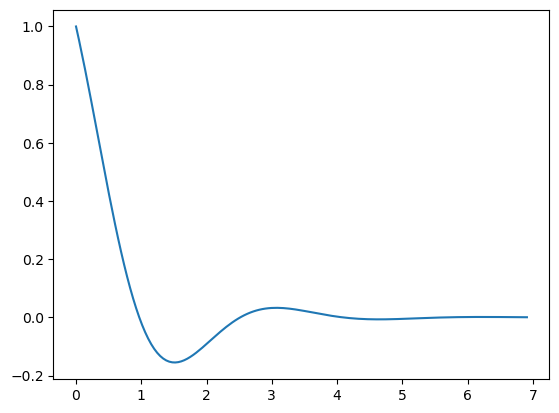

In [39]:
x, y = ct.impulse_response(Y)

plt.plot(x, y)
plt.show()